In [ ]:
! pip install -q kaggle

In [1]:
with open("kaggle.json", 'w+') as f:
  f.write("""{"username":"himanshukumarsharma","key":"838beb1ee2f5c06e8b4c7c8621cdf7a2"}""")

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset

100% 4.95G/4.95G [02:21<00:00, 40.5MB/s]
100% 4.95G/4.95G [02:21<00:00, 37.6MB/s]


In [3]:
! unzip /content/cbis-ddsm-breast-cancer-image-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: train/jpeg/1.3.6.1.4.1.9590

In [2]:
csv ="/content/train/csv"
image_path = "/content/train/jpeg"

In [1]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import glob
import pandas as pd
# import seaborn as sns
from PIL import Image
import cv2


ModuleNotFoundError: No module named 'seaborn'

In [4]:

for i in glob.glob(csv+"/*"):
  if "test" not in str(i):
    print(i)
  # data =pd.read_csv(str(i))
  #   print(data.head(2))

/content/train/csv/meta.csv
/content/train/csv/calc_case_description_train_set.csv
/content/train/csv/dicom_info.csv
/content/train/csv/mass_case_description_train_set.csv


In [5]:
meta = pd.read_csv("/content/train/csv/meta.csv")
mass_case = pd.read_csv("/content/train/csv/mass_case_description_train_set.csv")
discom_info = pd.read_csv("/content/train/csv/dicom_info.csv")
calc_case = pd.read_csv("/content/train/csv/calc_case_description_train_set.csv")

In [6]:
for i in mass_case.columns:
  if len(mass_case[i].unique())<20:
    print(i,mass_case[i].unique())

breast_density [3 2 1 4]
left or right breast ['LEFT' 'RIGHT']
image view ['CC' 'MLO']
abnormality id [1 2 3 4 5 6]
abnormality type ['mass']
mass shape ['IRREGULAR-ARCHITECTURAL_DISTORTION' 'ARCHITECTURAL_DISTORTION' 'OVAL'
 'IRREGULAR' 'LYMPH_NODE' 'LOBULATED-LYMPH_NODE' 'LOBULATED'
 'FOCAL_ASYMMETRIC_DENSITY' 'ROUND' 'LOBULATED-ARCHITECTURAL_DISTORTION'
 'ASYMMETRIC_BREAST_TISSUE' 'LOBULATED-IRREGULAR' nan 'OVAL-LYMPH_NODE'
 'LOBULATED-OVAL' 'ROUND-OVAL' 'IRREGULAR-FOCAL_ASYMMETRIC_DENSITY'
 'ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION' 'ROUND-LOBULATED']
mass margins ['SPICULATED' 'ILL_DEFINED' 'CIRCUMSCRIBED' 'ILL_DEFINED-SPICULATED'
 'OBSCURED' 'OBSCURED-ILL_DEFINED' nan 'MICROLOBULATED'
 'MICROLOBULATED-ILL_DEFINED-SPICULATED' 'MICROLOBULATED-SPICULATED'
 'CIRCUMSCRIBED-ILL_DEFINED' 'MICROLOBULATED-ILL_DEFINED'
 'CIRCUMSCRIBED-OBSCURED' 'OBSCURED-SPICULATED'
 'OBSCURED-ILL_DEFINED-SPICULATED' 'CIRCUMSCRIBED-MICROLOBULATED']
assessment [4 3 5 2 0 1]
pathology ['MALIGNANT' 'BENIGN' '

<h1>Content</h1>
<h2>Image View:</h2>
<ul>
    <li><strong>CC:</strong> Cranial Caudal (CC) view</li>
    <li><strong>MLO:</strong> Mediolateral Oblique (MLO) view</li>
</ul>
<p>The MLO view is taken from the center of the chest outward, while the CC view is taken from above the breast.</p>

<h2>Breast Density:</h2>
<p>Breast density is categorized into four categories:</p>
<ol>
    <li><strong>Category 1:</strong> The breast mainly consists of fat tissue (very low breast density).</li>
    <li><strong>Category 2:</strong> A large proportion of the breast consists of fat tissue, with a few areas of dense glandular tissue and connective tissue.</li>
    <li><strong>Category 3:</strong> The breast has more glandular and connective tissue than fat tissue.</li>
    <li><strong>Category 4:</strong> The breast is almost completely made up of glandular and connective tissue (very high breast density).</li>
</ol>
<p>Compared to women with low breast density, women with dense breast tissue are somewhat more likely to get breast cancer.</p>

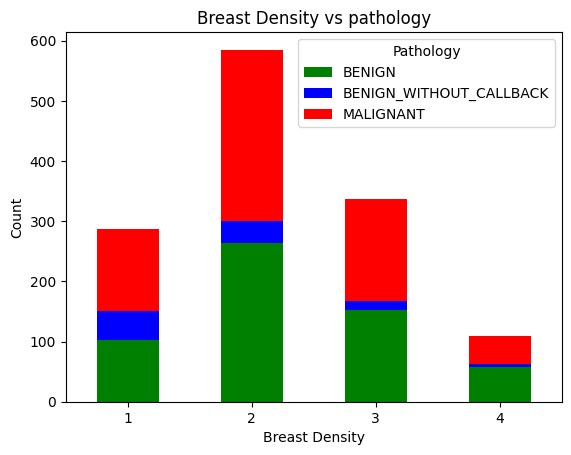

In [7]:
df = mass_case.copy()#pd.DataFrame(data)

# Grouping by breast density and paralogy and counting occurrences
grouped = df.groupby(['breast_density', 'pathology']).size().unstack(fill_value=0)
color_map = {'MALIGNANT':'red', 'BENIGN':'green', 'BENIGN_WITHOUT_CALLBACK' : 'blue'}
# Plotting
grouped.plot(kind='bar', stacked=True, color=color_map)
plt.title('Breast Density vs pathology')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Pathology')
plt.show()

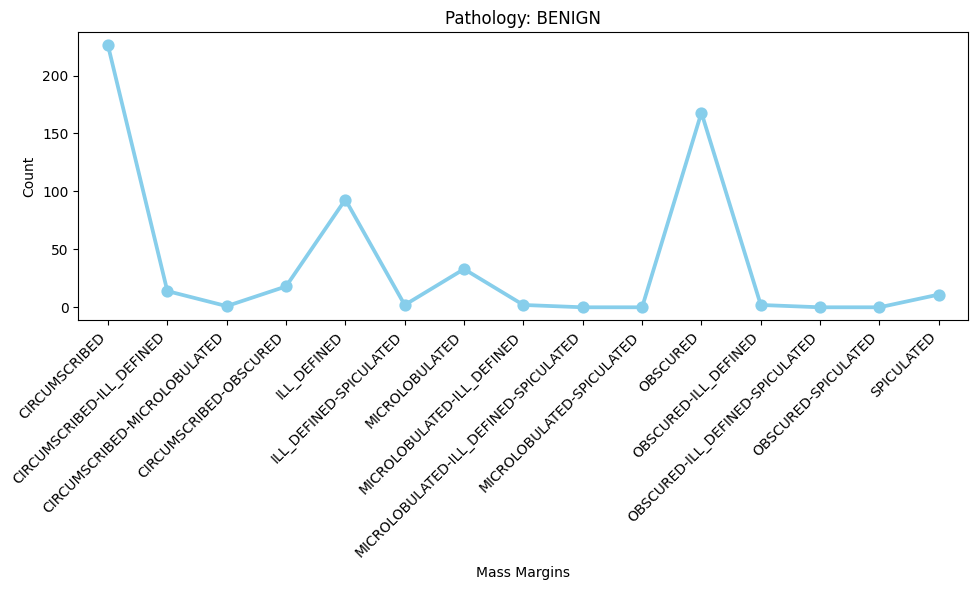

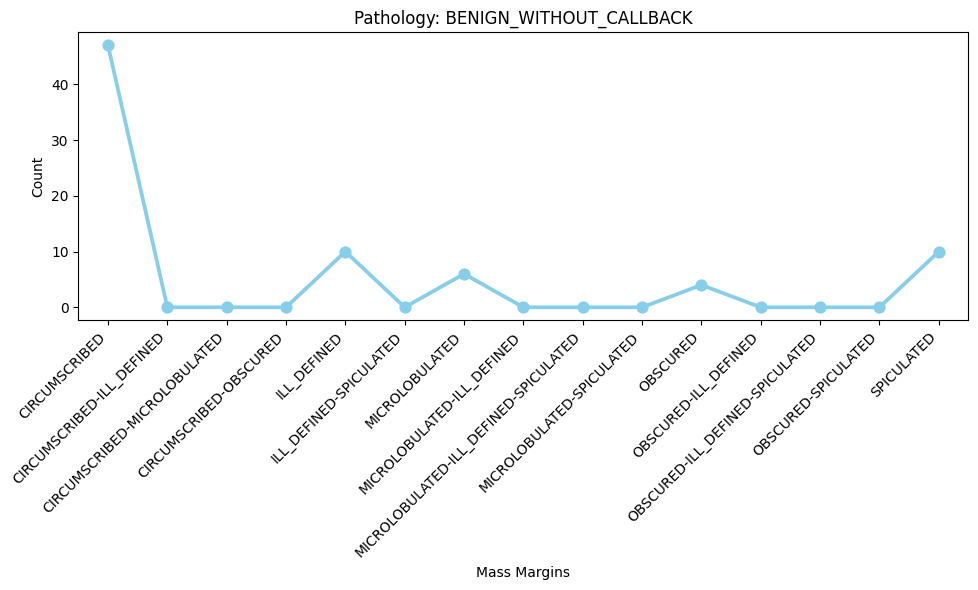

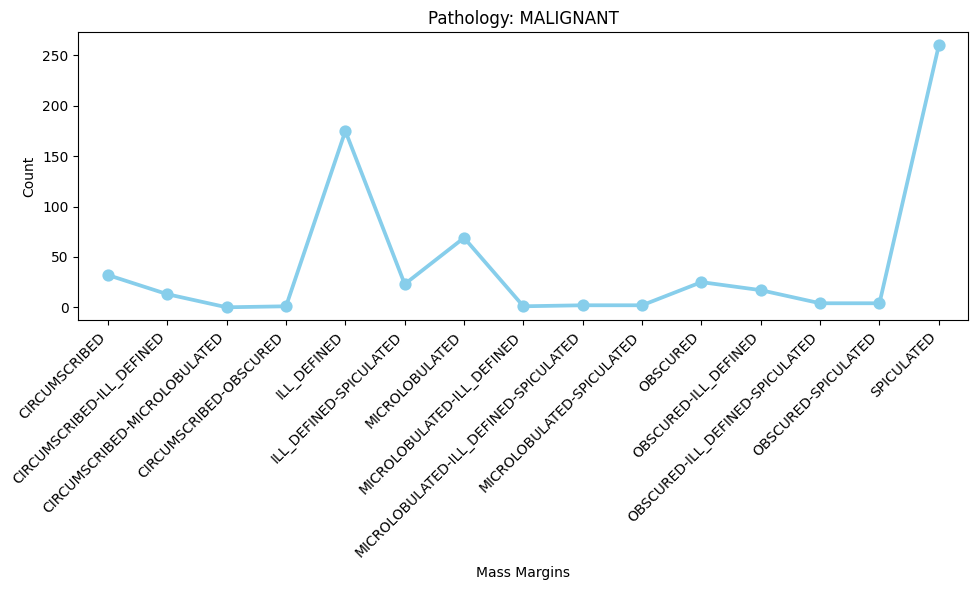

In [8]:
grouped = df.groupby(['pathology','mass margins']).size().unstack(fill_value=0)
# for pathology in grouped.index:
#     # Get the corresponding row of grouped data for the current pathology
#     pathology_data = grouped.loc[pathology]

#     # Plotting with Seaborn
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=pathology_data.index, y=pathology_data.values, color='skyblue')

#     # Adding lines connecting each bar
#     for i in range(len(pathology_data) - 1):
#         plt.plot([i, i + 1], [pathology_data.iloc[i], pathology_data.iloc[i + 1]], marker='o', color='black')

#     plt.title(f'Pathology: {pathology}')
#     plt.xlabel('Mass Margins')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()


for pathology in grouped.index:
    # Get the corresponding row of grouped data for the current pathology
    pathology_data = grouped.loc[pathology]

    # Plotting with Seaborn pointplot
    plt.figure(figsize=(10, 6))
    sns.pointplot(x=pathology_data.index, y=pathology_data.values, color='skyblue')

    plt.title(f'Pathology: {pathology}')
    plt.xlabel('Mass Margins')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

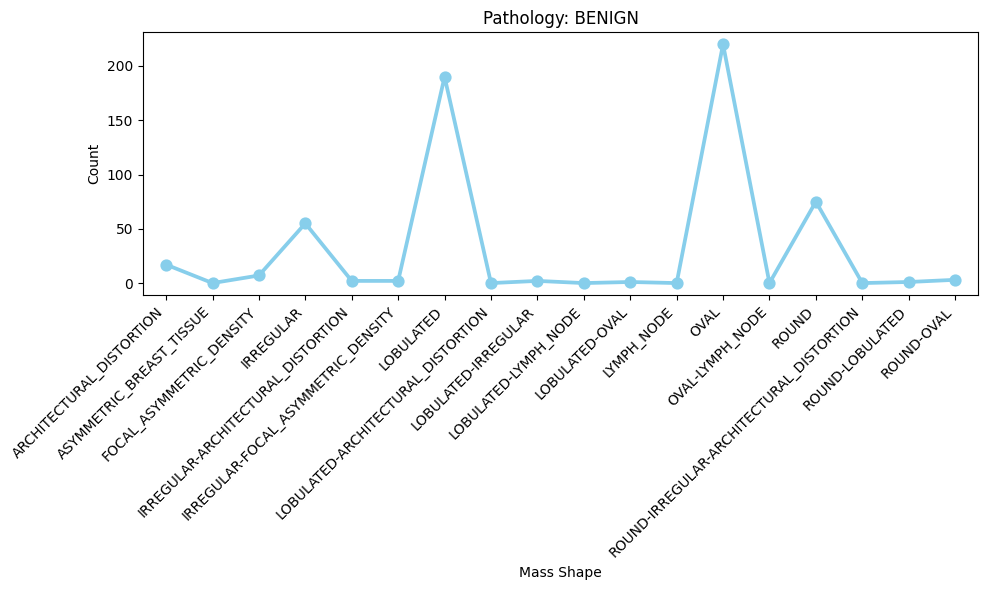

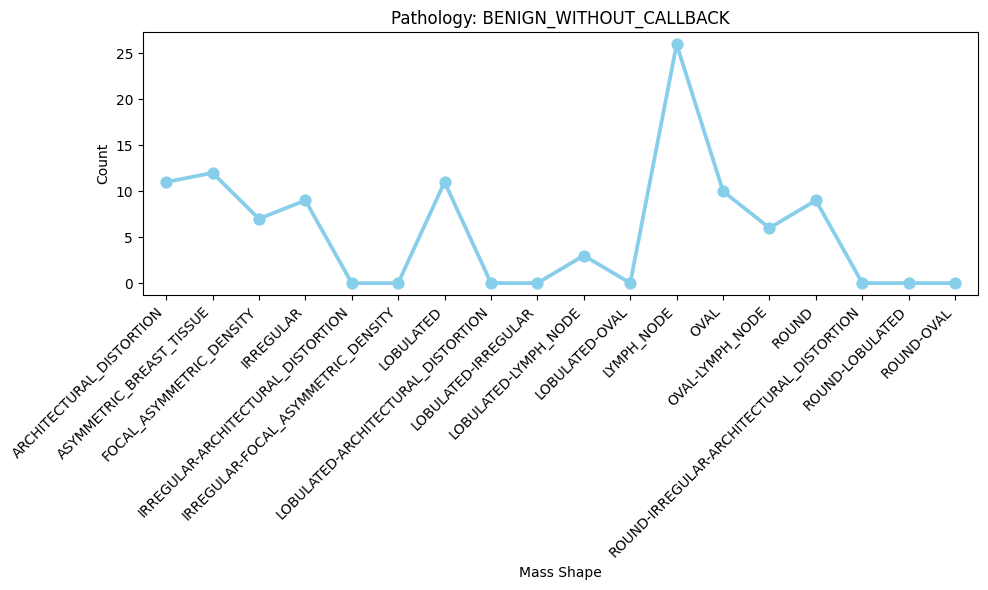

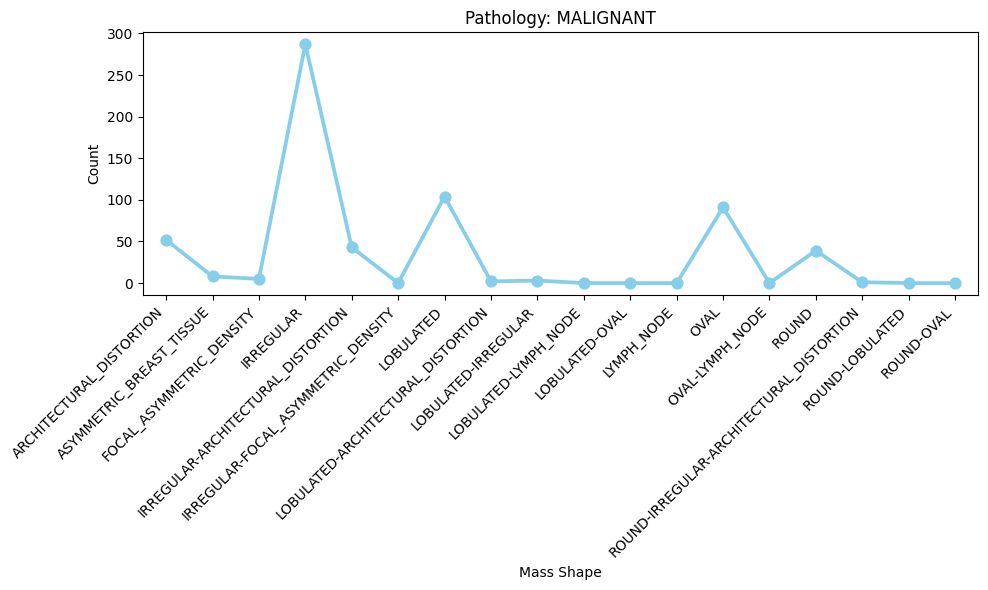

In [9]:
grouped = df.groupby(['pathology','mass shape']).size().unstack(fill_value=0)
# for pathology in grouped.index:
#     # Get the corresponding row of grouped data for the current pathology
#     pathology_data = grouped.loc[pathology]

#     # Plotting with Seaborn
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=pathology_data.index, y=pathology_data.values, color='skyblue')

#     # Adding lines connecting each bar
#     for i in range(len(pathology_data) - 1):
#         plt.plot([i, i + 1], [pathology_data.iloc[i], pathology_data.iloc[i + 1]], marker='o', color='black')

#     plt.title(f'Pathology: {pathology}')
#     plt.xlabel('mass shape')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()


arranged_mass_shape =["ROUND", "OVAL","LOBULATED", "ASYMMETRIC_BREAST_TISSUE", "LYMPH_NODE", "FOCAL_ASYMMETRIC_DENSITY", "ARCHITECTURAL_DISTORTION", "IRREGULAR", "LOBULATED-IRREGULAR",\
 "OVAL-LYMPH_NODE", "LOBULATED-OVAL", "ROUND-OVAL",  "IRREGULAR-FOCAL_ASYMMETRIC_DENSITY","IRREGULAR-ARCHITECTURAL_DISTORTION", "ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION", "LOBULATED-ARCHITECTURAL_DISTORTION", "LOBULATED-LYMPH_NODE",\
    "ROUND-LOBULATED"]

for pathology in grouped.index:
    # Get the corresponding row of grouped data for the current pathology
    pathology_data = grouped.loc[pathology]

    # Plotting with Seaborn pointplot
    plt.figure(figsize=(10, 6))
    sns.pointplot(x=pathology_data.index, y=pathology_data.values, color='skyblue')

    plt.title(f'Pathology: {pathology}')
    plt.xlabel('Mass Shape')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [10]:
discom_info['SeriesDescription'].value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [11]:
image_dir = '/content/train/jpeg'
dicom_data= discom_info.copy()
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    key = dicom.split("/")[4]
    full_mammogram_dict[key] = dicom

for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[4]
    roi_mask_dict[key] = dicom

print(len(full_mammogram_dict.keys()), len(cropped_dict.keys()), len(roi_mask_dict.keys()))

2857 3567 3247


In [12]:
def filter_dataframe_by_base_directory(df):
    base_directory = '/content/train/jpeg'

    # Check if all three columns start with the base directory
    mask = (
        df['image file path'].str.startswith(base_directory) &
        df['cropped image file path'].str.startswith(base_directory) &
        df['ROI mask file path'].str.startswith(base_directory)
    )

    # Keep only the rows where all three columns start with the base directory
    filtered_df = df[mask]

    return filtered_df


def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

fix_image_path_mass(mass_case)
mass_case_filtered = filter_dataframe_by_base_directory(mass_case)

fix_image_path_mass(calc_case)
calc_case_filtered = filter_dataframe_by_base_directory(calc_case)


In [13]:
mass_case.shape, mass_case_filtered.shape, calc_case.shape, calc_case_filtered.shape

((1318, 14), (1318, 14), (1546, 14), (1544, 14))

In [14]:
def columns_name_correct(df):
  columns = {}
  for i in df.columns:
    columns[i]=i.replace(" ","_")

  return columns

In [15]:
mass_case_filtered_correction = columns_name_correct(mass_case_filtered)
mass_case_dataset = mass_case_filtered.rename(columns=mass_case_filtered_correction)

calc_case_filtered_correction = columns_name_correct(calc_case_filtered)
calc_case_dataset = calc_case_filtered.rename(columns=calc_case_filtered_correction)


In [16]:
mass_case_dataset = mass_case_dataset.fillna("Missing")
calc_case_dataset =calc_case_dataset.fillna("Missing")

In [17]:
combined_data = pd.concat([calc_case_dataset, mass_case_dataset], axis=0, ignore_index=True)

In [18]:
#combined_data.to_csv("combined.csv")

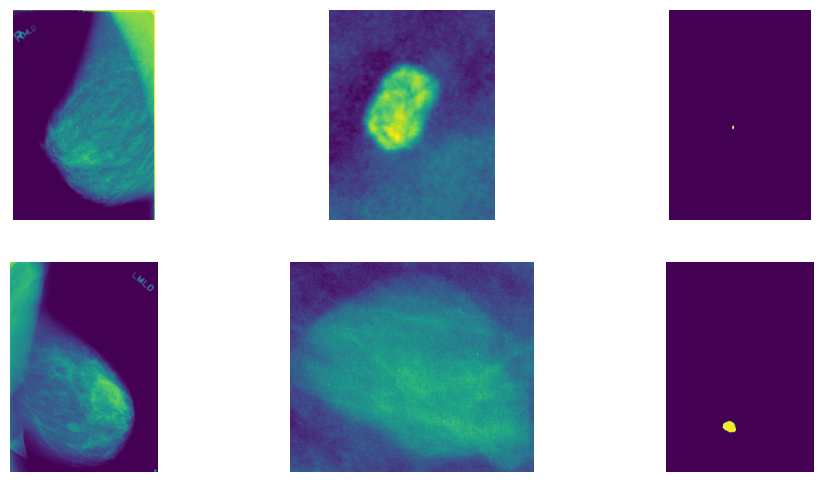

In [20]:
# df = combined_data[["image_file_path","cropped_image_file_path", "ROI_mask_file_path"]]
from PIL import Image
random_rows = combined_data.sample(2)

# Display images from the selected rows
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, (_, row) in enumerate(random_rows.iterrows()):
    image_files = [row['image_file_path'], row['cropped_image_file_path'], row['ROI_mask_file_path']]
    for j, image_file in enumerate(image_files):
        image = Image.open(image_file)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.show()

MALIGNANT
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727/1-189.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894/2-108.jpg


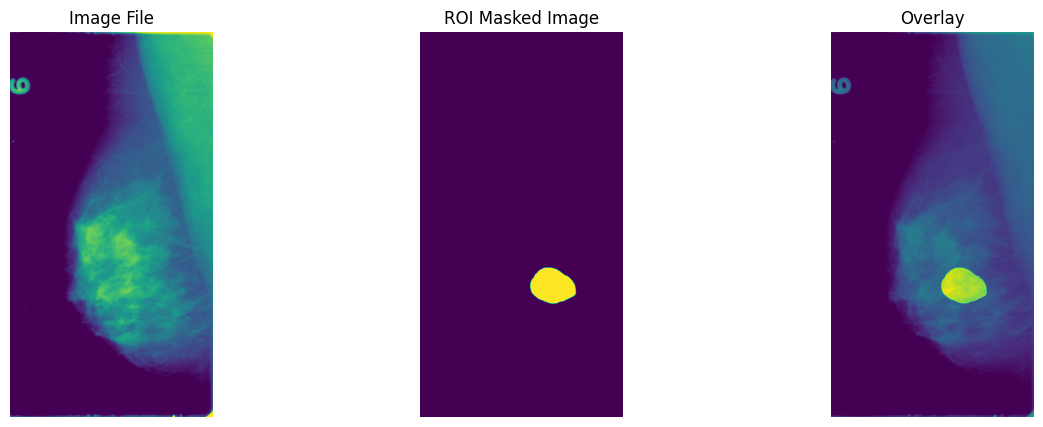

BENIGN
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.171690193811939034300995285902067361456/1-094.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.49659321812549392635504797472061503604/2-180.jpg


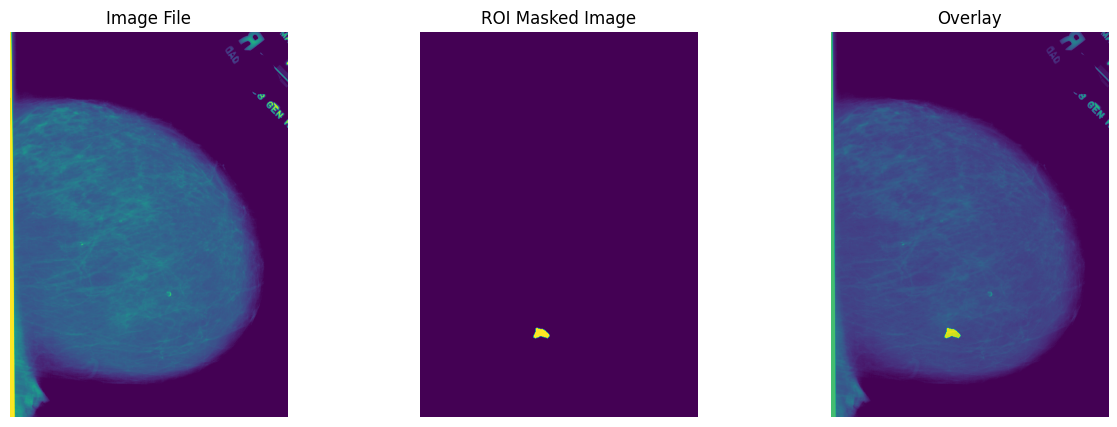

In [21]:
random_rows = combined_data.sample(2)

for i, (_, row) in enumerate(random_rows.iterrows()):
    print(row["pathology"])
    print(row["image_file_path"], row["ROI_mask_file_path"])
    image_file = Image.open(row['image_file_path'])
    roi_masked_image = Image.open(row['ROI_mask_file_path'])
    # roi_masked_image = roi_masked_image.resize(image_file.size)
    overlay = Image.blend(image_file, roi_masked_image, alpha=0.5)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image_file)
    axes[0].set_title('Image File')
    axes[0].axis('off')

    axes[1].imshow(roi_masked_image)
    axes[1].set_title('ROI Masked Image')
    axes[1].axis('off')

    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/1-192.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495/2-111.jpg


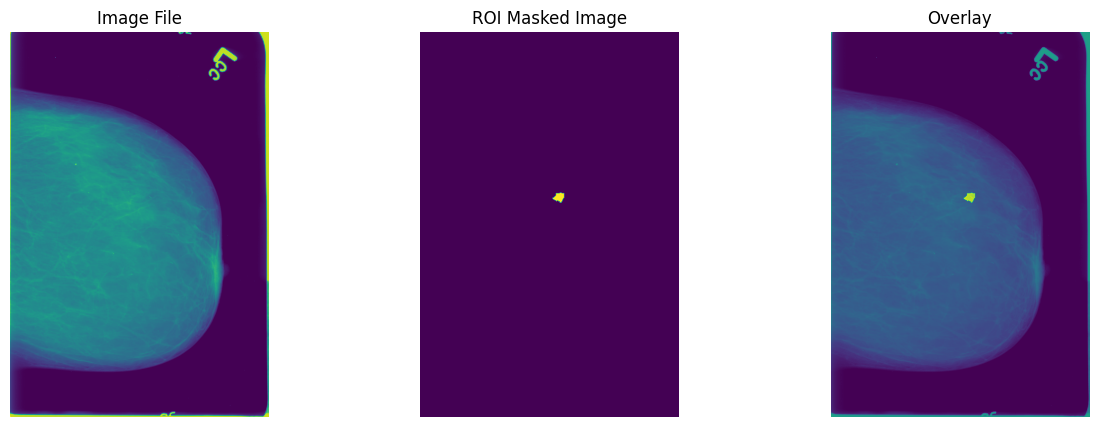

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/1-192.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.2024181113538627406890441552979568519/2-112.jpg


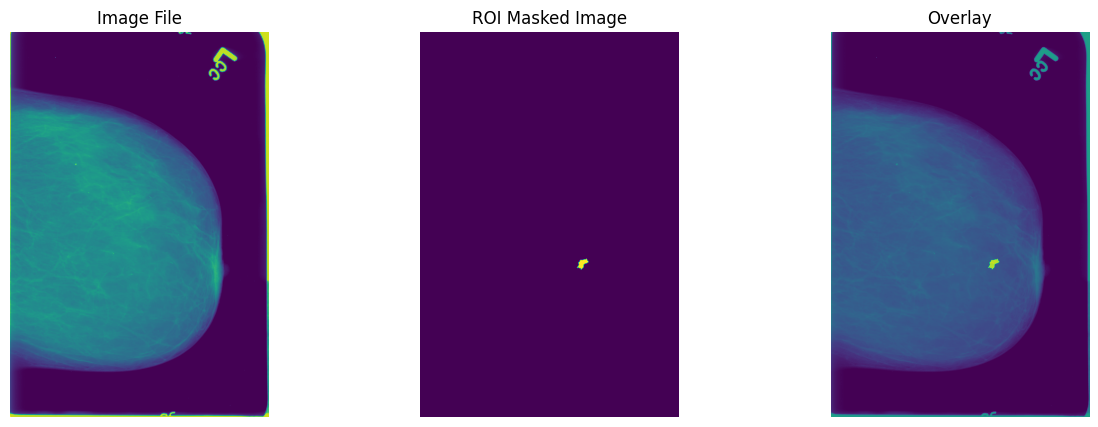

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/1-192.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.358964325411863896506852883280957478483/2-113.jpg


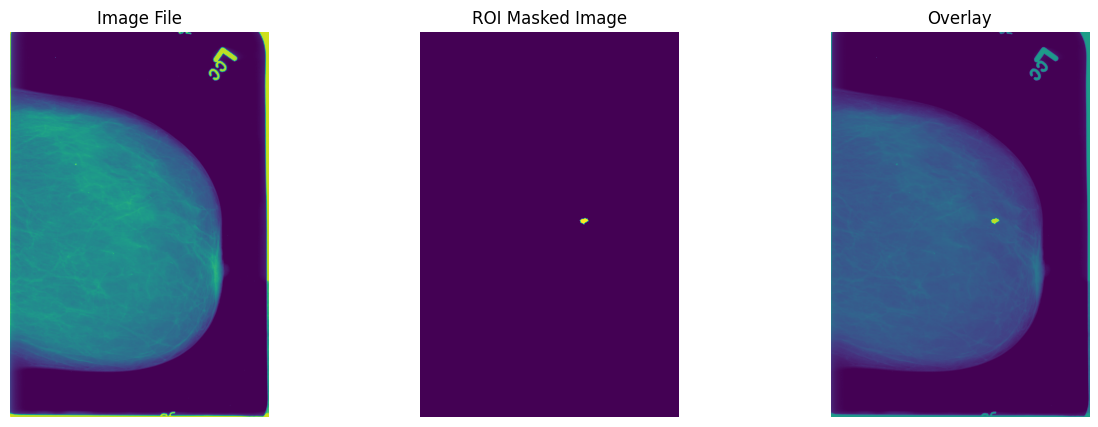

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.14784689311239808604822345534163797907/1-193.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.81216723513826953322779836314123146864/2-114.jpg


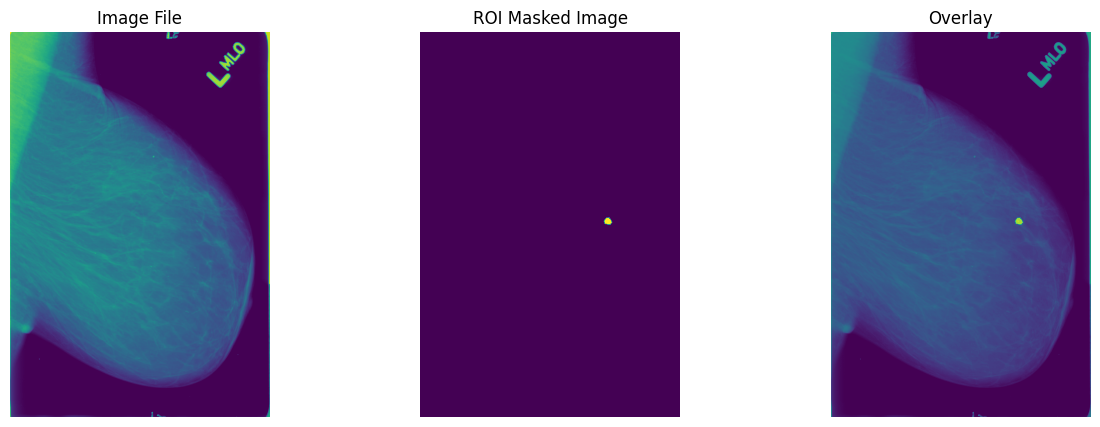

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.14784689311239808604822345534163797907/1-193.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.101644730412034535338273957660005319377/2-115.jpg


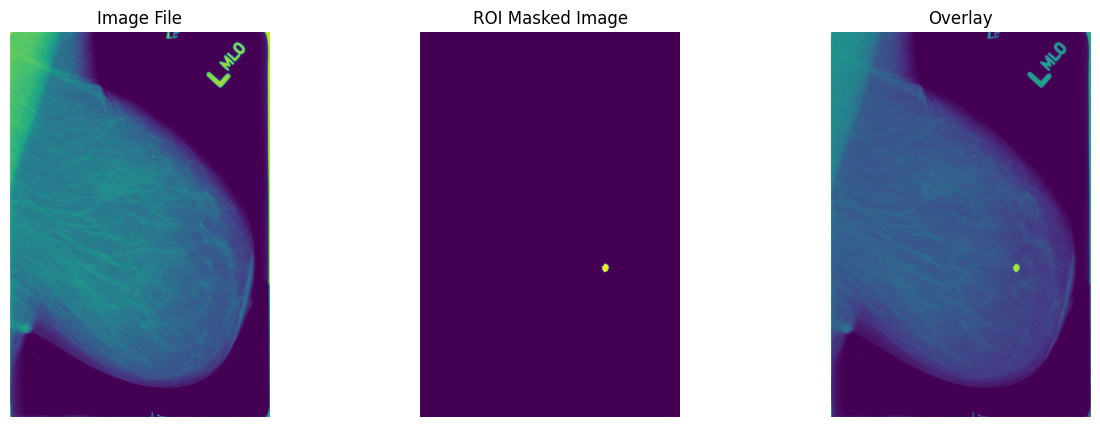

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.14784689311239808604822345534163797907/1-193.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.4165882011639284134385639942174899929/2-116.jpg


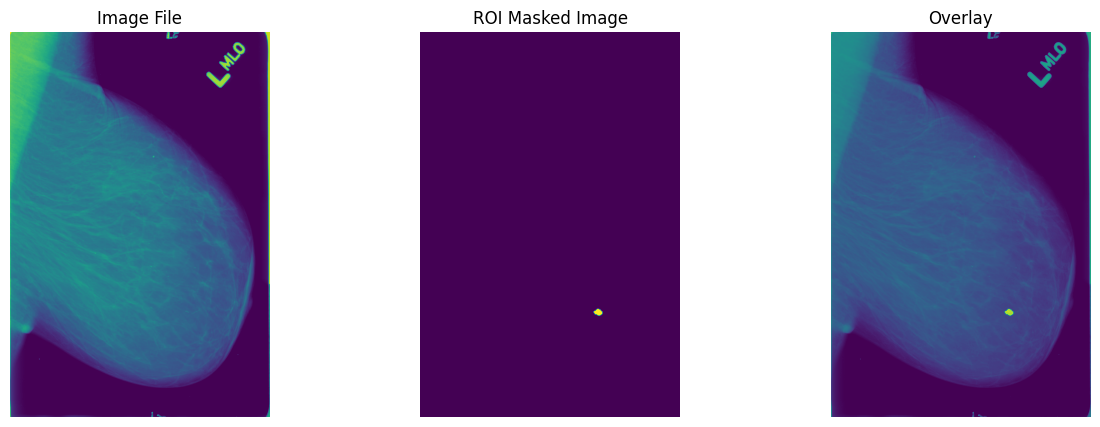

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.22623043712768131109740179664004028729/1-194.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.381673661212780323135268919272474455898/2-117.jpg


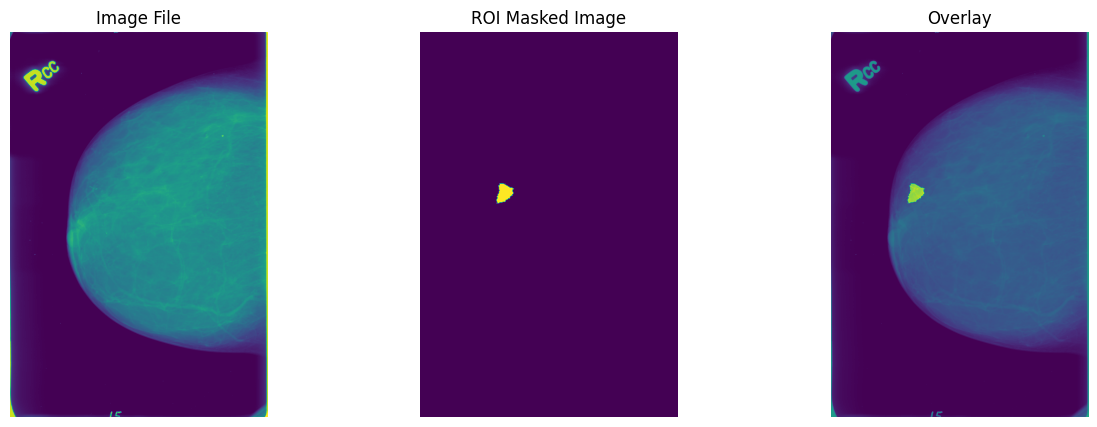

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.22623043712768131109740179664004028729/1-194.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.402144517512294257725014657711360120612/2-118.jpg


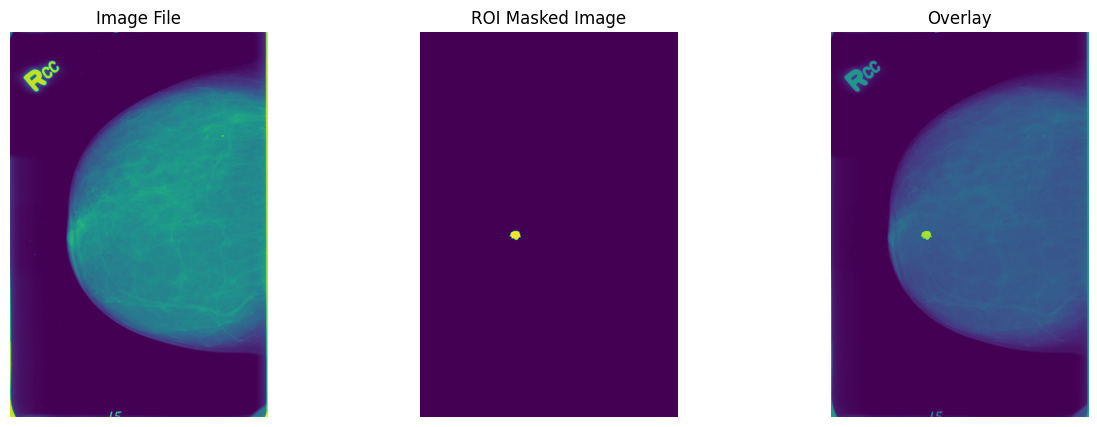

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.22623043712768131109740179664004028729/1-194.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.47180989312717299212637285692300339843/2-119.jpg


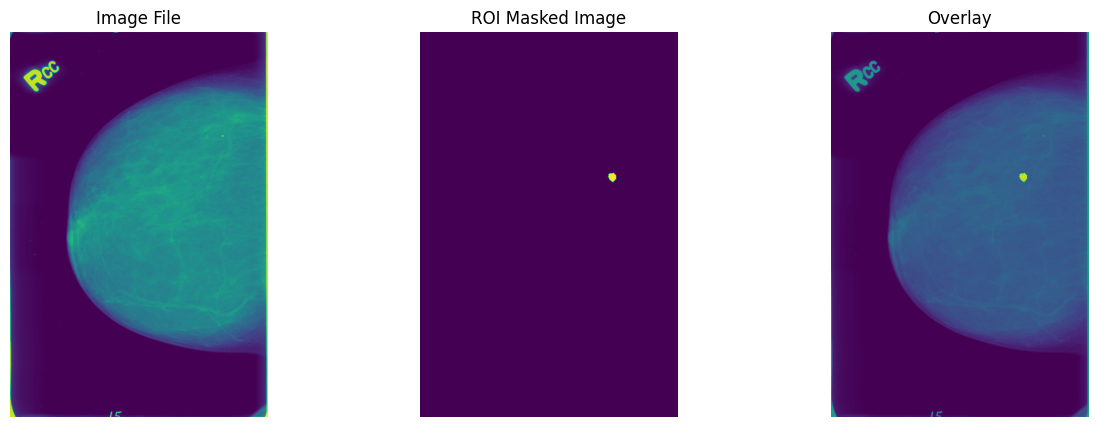

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.22623043712768131109740179664004028729/1-194.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.14064028811800401439367322990347421397/2-120.jpg


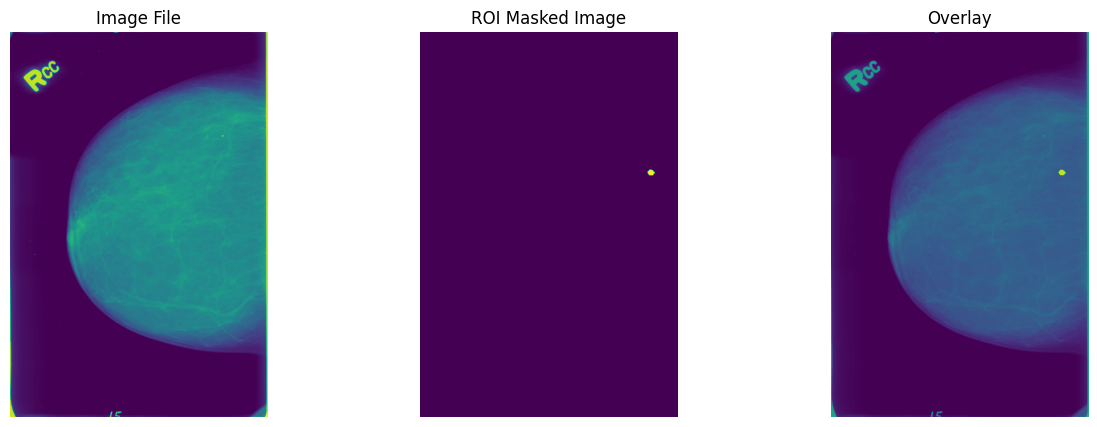

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.22623043712768131109740179664004028729/1-194.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.120909200811297129534990621883140982571/2-121.jpg


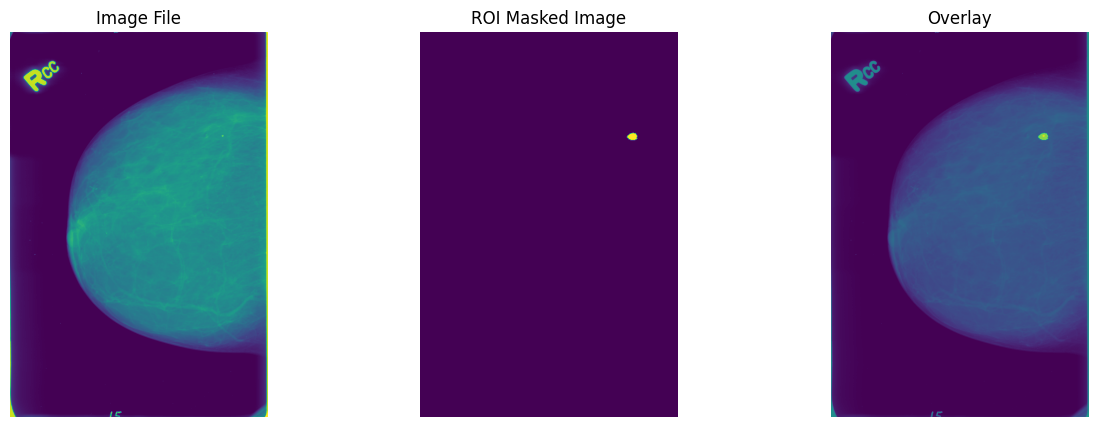

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.101743131510015201839523365310215332980/1-195.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.178605044312208856828349828402686035872/2-122.jpg


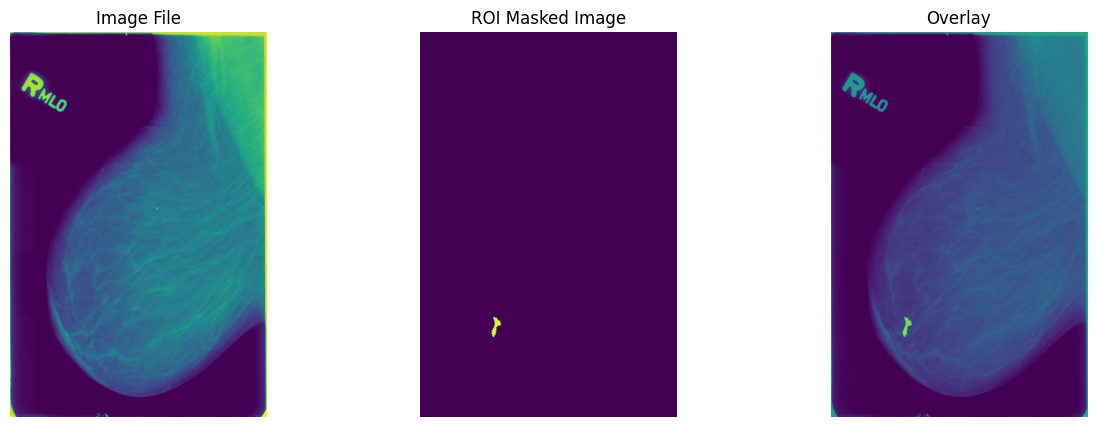

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.101743131510015201839523365310215332980/1-195.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.331272392312810680208167182330569113015/2-123.jpg


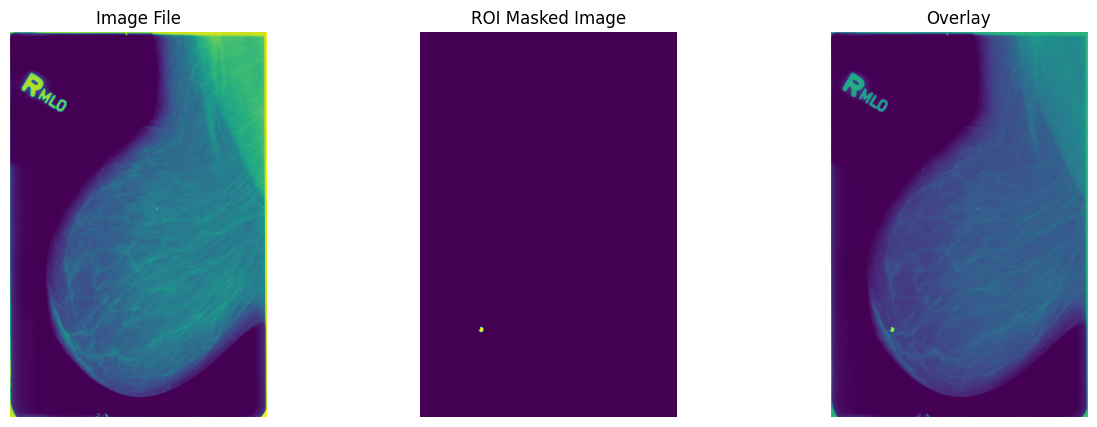

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.101743131510015201839523365310215332980/1-195.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.235185902412273841827024570100408842689/2-124.jpg


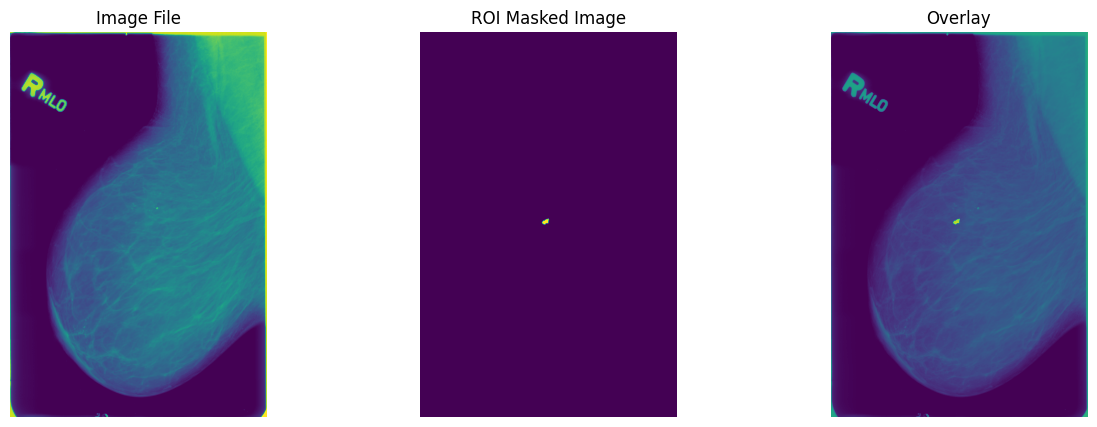

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.101743131510015201839523365310215332980/1-195.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.390127867912048244225667613783565099051/2-125.jpg


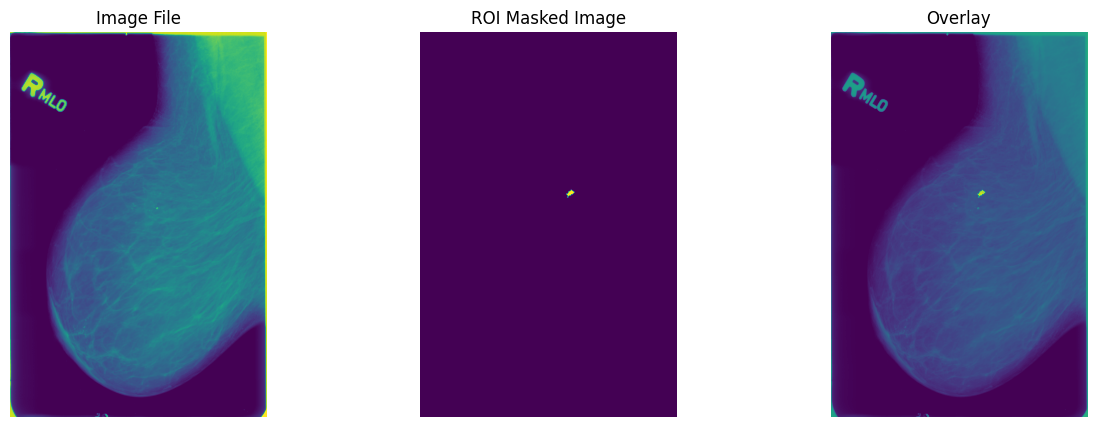

BENIGN_WITHOUT_CALLBACK
/content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.101743131510015201839523365310215332980/1-195.jpg /content/train/jpeg/1.3.6.1.4.1.9590.100.1.2.110239940911508321642452494603485658950/2-126.jpg


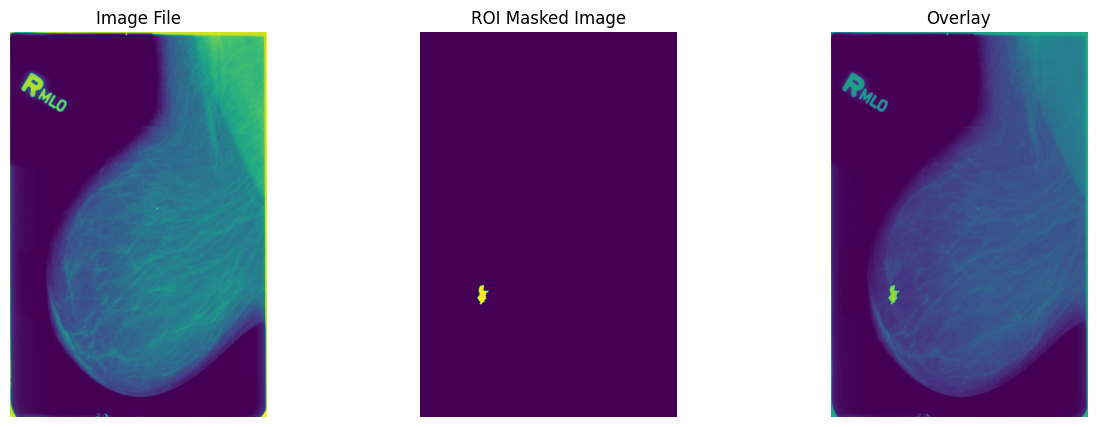

In [20]:
from PIL import Image
random_rows = combined_data[combined_data["patient_id"]=="P_00008"]

for i, (_, row) in enumerate(random_rows.iterrows()):
    print(row["pathology"])
    print(row["image_file_path"], row["ROI_mask_file_path"])
    image_file = Image.open(row['image_file_path'])
    roi_masked_image = Image.open(row['ROI_mask_file_path'])
    # roi_masked_image = roi_masked_image.resize(image_file.size)
    overlay = Image.blend(image_file, roi_masked_image, alpha=0.5)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image_file)
    axes[0].set_title('Image File')
    axes[0].axis('off')

    axes[1].imshow(roi_masked_image)
    axes[1].set_title('ROI Masked Image')
    axes[1].axis('off')

    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()

In [ ]:
from PIL import Image
random_rows = combined_data[combined_data["patient_id"]=="P_00008"]

for i, (_, row) in enumerate(random_rows.iterrows()):
    print(row["pathology"])
    print(row["image_file_path"], row["ROI_mask_file_path"])
    image_file = Image.open(row['image_file_path'])
    roi_masked_image = Image.open(row['ROI_mask_file_path'])
    overlay = Image.blend(image_file, roi_masked_image, alpha=0.5)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(image_file)
    axes[0].set_title('Image File')
    axes[0].axis('off')

    axes[1].imshow(roi_masked_image)
    axes[1].set_title('ROI Masked Image')
    axes[1].axis('off')

    axes[2].imshow(overlay)
    axes[2].set_title('Overlay')
    axes[2].axis('off')

    plt.show()

In [46]:
test=random_rows[ (random_rows["left_or_right_breast"]=="LEFT") & (random_rows["image_view"]=="CC") ]

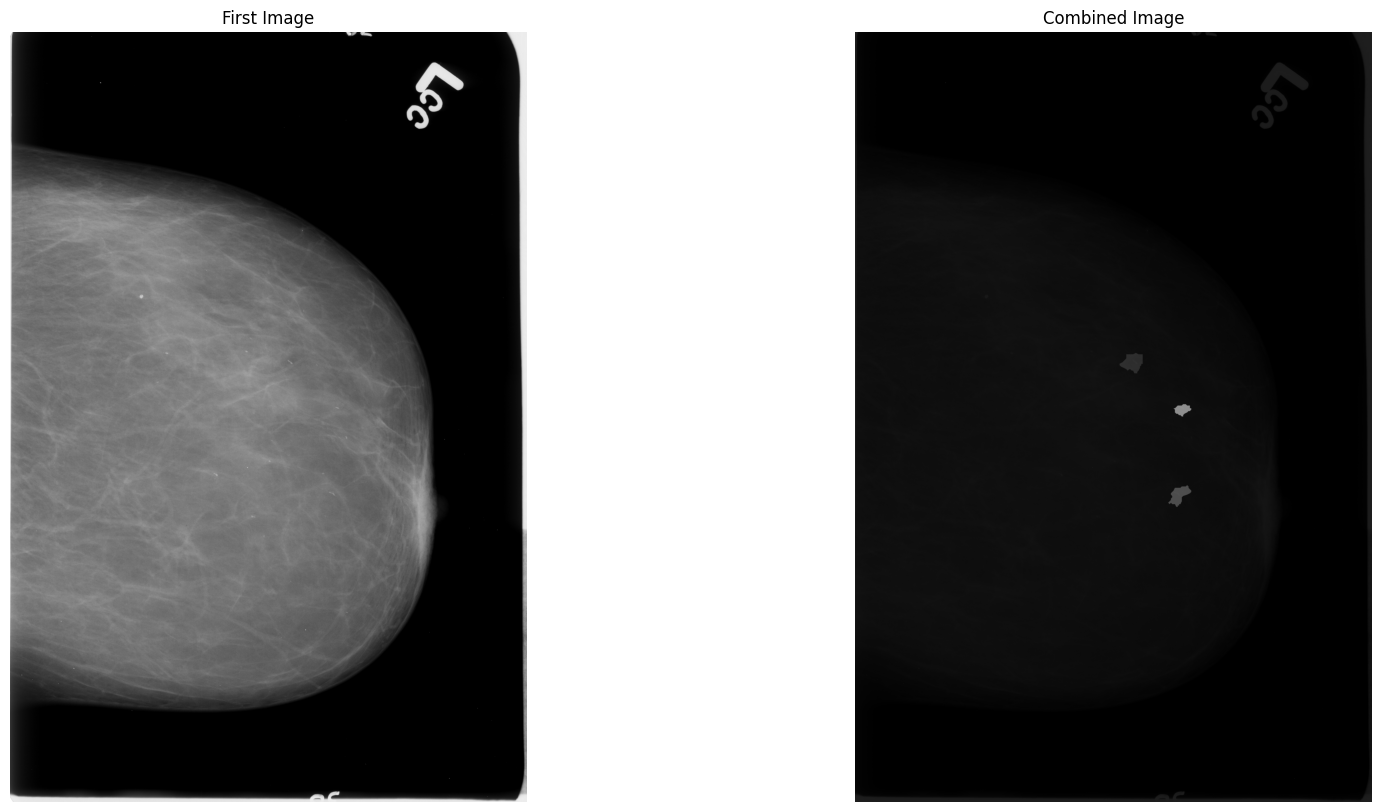

In [55]:

def overlap_images(image_names):
    # Read the first image
    img_first = cv2.imread(image_names[0])
    combined_image = img_first.copy()  # Initialize combined image with the first image

    # Loop through the remaining images
    for image_name in image_names[1:]:
        img = cv2.imread(image_name)
        img = cv2.resize(img, (img_first.shape[1], img_first.shape[0]))  # Resize image to match first image size
        combined_image = cv2.addWeighted(combined_image, 0.5, img, 0.5, 0)  # Combine images with equal weight

    # Display the first image and the combined image
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(cv2.cvtColor(img_first, cv2.COLOR_BGR2RGB))
    axes[0].set_title("First Image")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Combined Image")
    axes[1].axis('off')

    plt.show()

# Example usage:
image_names = list(set(test["image_file_path"].tolist())) + test["ROI_mask_file_path"].tolist()
overlap_images(image_names)